<a href="https://colab.research.google.com/github/najwacaesa/Mini-Project-DataMIning/blob/main/Mini_Project_Datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis Penjualan Walmart untuk Mengoptimalkan Strategi Pemasaran**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

uniform_data = np.random.rand(10, 12)

##**BUSINESS UNDERSTANDING**

###**Business Objective**

Tujuan bisnis nya adalah untuk memahami bagaimana analisis data penjualan Walmart dapat mendukung pengambilan keputusan bisnis dan strategi pemasaran yang lebih efektif.

###**Assess Situation**

Walmart, salah satu retailer terbesar di dunia, menghadapi tekanan persaingan yang meningkat di pasar ritel global. Dalam upaya untuk tetap kompetitif dan mempertahankan pangsa pasar mereka, Walmart ingin meningkatkan efektivitas strategi pemasaran dan pengambilan keputusan mereka dengan memanfaatkan data penjualan yang tersedia

###**Data Mining Goals**

Tujuan data mining dataset ini yang pertama adalah untuk memahami pola penjualan dan dapat mengidentifikasi factor-faktor penentu penjualan untuk menentukan bagaimana elemen-elemen ini berdampak pada volume penjualan. Selain itu, tujuan data mining lainnya yaitu untuk memprediksi penjualan walmart ke depannya agar dapat membantu walmart dalam perencanaan persediaan, pengelolaan inventaris, dan hal-hal lainnya.

###**Project Plan**

Hal pertama yang harus dilakukan tentu saja dengan memahami proyek dan dilanjutkan dengan proses pengumpulan serta pemrosesan data. Setelah data diproses dilanjutkan dengan menganalisis data entah dari segi distribusi penjualan, tren penjualan, dan lainnya. Hal selanjutnya adalan pengimplementasian data dari hasil analisis sebelumnya dengan menggunakan stategi yang sesuai. Dan yang terakhir adalh melakukan evaluasi bagaimana kinerja strategi pemasaran dan pengambilan keputusan bisnis sebelumnya

##**DATA UNDERSTANDING**

##**Collect Initial Data**

Data yang saya gunakan pada project ini saya ambil dari https://www.kaggle.com/ dengan judul Walmart Sales, Berikut link dataset yang saya gunakan https://www.kaggle.com/datasets/mikhail1681/walmart-sales

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/najwacaesa/Mini-Project-DataMIning/main/Walmart_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


##**Describe Data**

###Informasi Dasar

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Pada Dataset ini memiliki 6435 Baris dan 8 Kolom, dengan nama kolom Store, Weekly Sales, Holiday Flag, Temperature, Fuel Price, CPI, dan Unemployment.

###Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


1. **Kolom Store** (Kolom ini menampilkan nomor store walmart yang ada)[Int]
2. **Kolom Date** (Kolom ini memberikan informasi kolom untuk menampilkan tanggal mulainya penjualan)[Object]
3. **Kolom Weekly_Sales** (Kolom ini memberikan informasi penjualan mingguan masinng-masing toko)[float]
4. **Kolom Holiday Flag** (Kolom ini menampilkan jumlah ada tidaknya hari libur) [Int]
5. **Kolom Temperature** (Kolom ini menampilkan suhu udara wilayah toko tersebut berada)[float]
6. **Kolom Fuel_Price** (Kolom ini memberikan informasi biaya bahan bakar di wilayah toko tersebut berada)[float]
7. **Kolom CPI**(Kolom ini memberikan informasi terkait Customer Price Index atau Indeks Harga Komsumen)[float]
8. **Kolom Unemployment** (Kolom ini menampilkan tingkat pengangguran dari masing-masing Toko)[float]

###Informasi Statistik Deskriptif

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Berikut penjelesan mengenai statistik deskriptif dari data diatas:

**1. Store**
Pada kolom store ini memiliki 6435 data dengan rata-rata 23, lalu kolom ini memiliki standar deviasi 12,988182. Nilai minimum kolom ini adalah 1 dan nilai maksimumnya adalah 45. Lalu nilai persentase 25% = 12, 50% (median) = 23, dan 75% = 34

 **2. Weekly_Sales**
 Pada kolom Weekly_Sales ini memiliki 6435 data dengan rata-rata 1.046965e+06, lalu kolom ini memiliki standar deviasi 5.643666e+05. Nilai minimum kolom ini adalah 2.099862e+05 dan nilai maksimumnya adalah 3.818686e+06. Lalu nilai persentase 25% = 5.533501e+05, 50% (median) = 9.607460e+05, dan 75% = 1.420159e+06

 **3. Holiday_Flag**
 Pada kolom Holiday_Flag ini memiliki 6435 data dengan rata-rata 0.069930, lalu kolom ini memiliki standar deviasi 0.255049. Nilai minimum kolom ini adalah 0 dan nilai maksimumnya adalah 1. Lalu nilai persentase 25% = 0, 50% (median) = 0, dan 75% = 0

  **4. Temperature**
  Pada kolom Temperature ini memiliki 6435 data dengan rata-rata 60.663782, lalu kolom ini memiliki standar deviasi 18.444933. Nilai minimum kolom ini adalah -2.060000 dan nilai maksimumnya adalah 100.140000. Lalu nilai persentase 25% = 47,46, 50% (median) = 62,67, dan 75% = 74,94.

  **5. Fuel_Price**
   Pada kolom Fuel Price ini memiliki 6435 data dengan rata-rata 3.358607, lalu kolom ini memiliki standar deviasi 0.459020. Nilai minimum kolom ini adalah 2.472000	 dan nilai maksimumnya adalah 4.468000. Lalu nilai persentase 25% = 2.933000, 50% (median) = 3.445000, dan 75% = 3.735000.

   **6. CPI**
   Pada kolom CPI (Customer Price Index) ini memiliki 6435 data dengan rata-rata 171.578394, lalu kolom ini memiliki standar deviasi 39.356712. Nilai minimum kolom ini adalah 126.064000 dan nilai maksimumnya adalah 227.232807. Lalu nilai persentase 25% = 131.735000, 50% (median) = 182.616521, dan 75% = 212.743293.

   **7. Unemployment**
   Pada kolom Unemployment ini memiliki 6435 data dengan rata-rata 7.999151, lalu kolom ini memiliki standar deviasi 1.875885. Nilai minimum kolom ini adalah 3.879000 dan nilai maksimumnya adalah 14.313000. Lalu nilai persentase 25% = 6.891000, 50% (median) = 7.874000, dan 75% = 8.622000.


##**Exploratory Data Analysis**

### Korelasi Antar Kolom

In [ ]:
import plotly.express as px

In [ ]:
px.imshow(df.corr(numeric_only=True))

**Korelasi Kolom Store dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Store' sebesar 1
*   Korelasi Kolom antar 'Weekly_Sales' & 'Store' sebesar -0,335
*   Korelasi Kolom antar 'Holiday_Flag' & 'Store' sebesar -4,386
*   Korelasi Kolom antar 'Temperature'  & 'Store' sebesar -0,022
*   Korelasi Kolom antar 'Fuel_Price' & 'Store' sebesar 0.060
*   Korelasi Kolom antar 'CPI' & 'Store' sebesar -0,209
*   Korelasi Kolom antar 'Unemployment' & 'Store' sebesar 0,223

**Korelasi Kolom Weekly Sales dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Weekly_Sales' sebesar -0,335
*   Korelasi Kolom antar 'Weekly_Sales' & 'Weekly_Sales' sebesar 1
*   Korelasi Kolom antar 'Holiday_Flag' & 'Weekly_Sales' sebesar 0,036
*   Korelasi Kolom antar 'Temperature'  & 'Weekly_Sales' sebesar -0,063
*   Korelasi Kolom antar 'Fuel_Price' & 'Weekly_Sales' sebesar 0.009
*   Korelasi Kolom antar 'CPI' & 'Weekly_Sales' sebesar -0,072
*   Korelasi Kolom antar 'Unemployment' & 'Weekly_Sales' sebesar -0,106

**Korelasi Kolom Holiday Flag dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Holiday_Flag' sebesar -4,836
*   Korelasi Kolom antar 'Weekly_Sales' & 'Holiday_Flag' sebesar 0,036
*   Korelasi Kolom antar 'Holiday_Flag' & 'Holiday_Flag' sebesar 1
*   Korelasi Kolom antar 'Temperature'  & 'Holiday_Flag' sebesar -0,155
*   Korelasi Kolom antar 'Fuel_Price' & 'Holiday_Flag' sebesar -0.078
*   Korelasi Kolom antar 'CPI' & 'Holiday_Flag' sebesar -0,002
*   Korelasi Kolom antar 'Unemployment' & 'Holiday_Flag' sebesar 0,010

**Korelasi Kolom Temperature dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Temperature' sebesar -0,022
*   Korelasi Kolom antar 'Weekly_Sales' & 'Temperature' sebesar -0,063
*   Korelasi Kolom antar 'Holiday_Flag' & 'Temperature' sebesar -0,155
*   Korelasi Kolom antar 'Temperature'  & 'Temperature' sebesar 1
*   Korelasi Kolom antar 'Fuel_Price' & 'Temperature' sebesar 0.144
*   Korelasi Kolom antar 'CPI' & 'Temperature' sebesar 0,176
*   Korelasi Kolom antar 'Unemployment' & 'Temperature' sebesar 0,101

**Korelasi Kolom Fuel_Price dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Fuel_Price' sebesar 0,060
*   Korelasi Kolom antar 'Weekly_Sales' & 'Fuel_Price' sebesar 0,009
*   Korelasi Kolom antar 'Holiday_Flag' & 'Fuel_Price' sebesar -0,076
*   Korelasi Kolom antar 'Temperature'  & 'Fuel_Price' sebesar 0.144
*   Korelasi Kolom antar 'Fuel_Price' & 'Fuel_Price' sebesar 1
*   Korelasi Kolom antar 'CPI' & 'Fuel_Price' sebesar -0,170
*   Korelasi Kolom antar 'Unemployment' & 'Fuel_Price' sebesar -0,034

**Korelasi Kolom CPI dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'CPI' sebesar -0,209
*   Korelasi Kolom antar 'Weekly_Sales' & 'CPI' sebesar -0,072
*   Korelasi Kolom antar 'Holiday_Flag' & 'CPI' sebesar -0,002
*   Korelasi Kolom antar 'Temperature'  & 'CPI' sebesar 0.176
*   Korelasi Kolom antar 'Fuel_Price' & 'CPI' sebesar 0,170
*   Korelasi Kolom antar 'CPI' & 'CPI' sebesar 1
*   Korelasi Kolom antar 'Unemployment' & 'CPI' sebesar -0,302

**Korelasi Kolom Unemployment dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Unemployment' sebesar 0,223
*   Korelasi Kolom antar 'Weekly_Sales' & 'Unemployment' sebesar -0,106
*   Korelasi Kolom antar 'Holiday_Flag' & 'Unemployment' sebesar 0.010
*   Korelasi Kolom antar 'Temperature'  & 'Unemployment' sebesar -0,101
*   Korelasi Kolom antar 'Fuel_Price' & 'Unemployment' sebesar -0,034
*   Korelasi Kolom antar 'CPI' & 'Unemployment' sebesar -0,302
*   Korelasi Kolom antar 'Unemployment' & 'Unemployment' sebesar 1

###Tingkat Pengangguran Pada Walmart

Text(0.5, 1.0, 'Tingkat Pengangguran Pada Walmart')

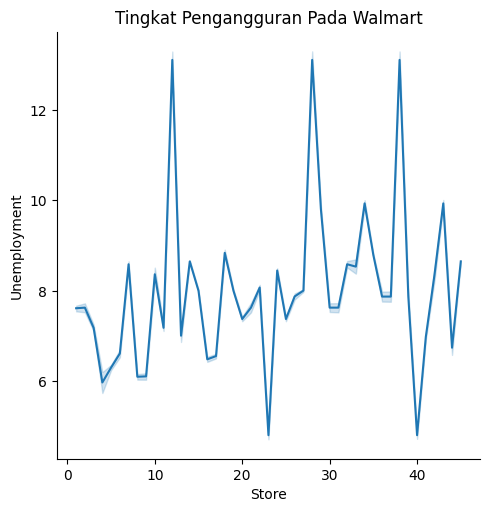

In [ ]:
sns.relplot(x='Store', y='Unemployment', data=df, kind='line')
plt.xlabel('Store')
plt.ylabel('Unemployment')
plt.title('Tingkat Pengangguran Pada Walmart')

Dapat dilihat pada diagram diatas pada beberapa toko memiliki tingkat pengangguran yang sangat tinggi, tetapi ada juga toko dengan tingkat pengangguran yang sangat kecil

###Jumlah Hari libur Toko

<Axes: ylabel='Holiday_Flag'>

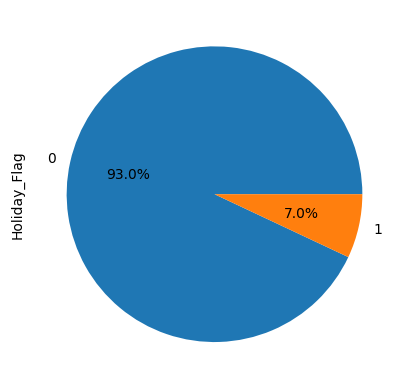

In [ ]:
Holiday_Flag = df['Holiday_Flag'].value_counts()
Holiday_Flag.plot(kind='pie', autopct='%1.1f%%', startangle=360)

Dari diagram diatas dapat disimpulkan bahwa sebagian besar toko Walmart tidak ada hari libur, hanya ada 7,0% yang memiliki 1 hari libur tokonya.

### Pengaruh Hari Libur Terhadap Penjualan Mingguan

Text(0.5, 1.0, 'Pengaruh Hari Libur tehadap Penjualan Mingguan')

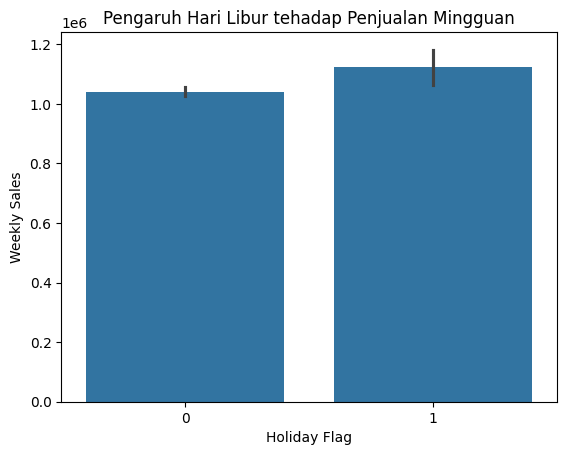

In [ ]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.title('Pengaruh Hari Libur tehadap Penjualan Mingguan')

Dapat dilihat bahwa pada toko yang memiliki hari libur mempunyai penjualan mingguan yang lebih tinggi dibandingkan toko yang tidak mempunyai hari libur.

##**Verify Data Quality**

###Missing Values

In [ ]:
df.isna()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Berdasarkan hasil analisis awal diatas,terlihat bahwa tidak ada missing values atau data yang hilang pada data tersebut

###Outliers Values

In [6]:
def detect_outliers(column):
    column = pd.to_numeric(column, errors='coerce')

    column = column.dropna()

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

    percentage_outliers = outliers.sum() / len(column) * 100

    return outliers, percentage_outliers

for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    print(f"Kolom '{column}':")
    print(f"  - Jumlah outliers: {outliers.sum()}")
    print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
    print()

Kolom 'Store':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Date':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'Weekly_Sales':
  - Jumlah outliers: 34
  - Persentase kehadiran outliers: 0.53%

Kolom 'Holiday_Flag':
  - Jumlah outliers: 450
  - Persentase kehadiran outliers: 6.99%

Kolom 'Temperature':
  - Jumlah outliers: 3
  - Persentase kehadiran outliers: 0.05%

Kolom 'Fuel_Price':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'CPI':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Unemployment':
  - Jumlah outliers: 481
  - Persentase kehadiran outliers: 7.47%



<ipython-input-6-75c92b6b53cd>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100


Berikut jumlah ouliners dari masing-masing kolom:
1. **Kolom Store** : Memiliki 0 Outliners dengan persentase 0%
2. **Kolom Date** : Memiliki 0 Outliners dengan persentase 0%
3. **Kolom Weekly_Sales** : Memiliki 34 Outliners dengan persentase 0,53%
4. **Kolom Holiday_Flag** : Memiliki 450 Outliners dengan persentase 6,99%
5. **KoloM Temperature** : Memiliki 3 Outliners dengan persentase 0,05%
6. **Kolom Fuel_Price** : Memiliki 0 Outliners dengan persentase 0%
7. **Kolom CPI** : Memiliki 0 Ouliners dengan persentase 0%
8. **Kolom Unemployment** : Memiliki 481 Outliners dengan persentase 7,47%


###Duplicated Values

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

Berdasarkan hasil analisis awal pada data diatas, dapat disimpulkan bahwa sebagian besar tidak terdapat duplicated values atau nilai yang terduplikat pada data tersebut.